## 29/01/2023

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

import sklearn
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

In [2]:
print("numpy version: ", np.__version__)
print("sklearn version: ", sklearn.__version__)
print("matplotlib version: ", matplotlib.__version__)


# numpy version:  1.24.1
# sklearn version:  1.2.0
# matplotlib version:  3.6.3

numpy version:  1.24.1
sklearn version:  1.2.0
matplotlib version:  3.6.3


Doc: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html

In [3]:
X, y = make_classification(n_samples=100, n_features=2, n_informative=1, n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41, hypercube=False, class_sep=15)

In [4]:
X

array([[ 0.35523945, -0.11697552],
       [-0.09282829, -0.73115232],
       [-0.1984984 , -0.7081059 ],
       [-2.44001098, -2.01199214],
       [-0.0448475 ,  1.63493163],
       [-1.68155714,  0.15599044],
       [-2.64121606,  1.07782053],
       [ 0.2416527 ,  0.80626713],
       [-0.40266099,  0.74859527],
       [-2.80888854,  0.75152794],
       [-2.62743539, -0.90114581],
       [-2.62900445, -0.1815243 ],
       [ 0.13405049, -2.98092432],
       [ 0.96162631,  1.20500136],
       [-2.67615806,  0.78302407],
       [ 0.54329928,  0.42968688],
       [ 0.01490532, -0.73229726],
       [-2.72870533, -0.83930476],
       [-0.02633711,  0.83727062],
       [-2.61974125, -0.10255323],
       [-3.1257262 ,  0.65867001],
       [-2.91434094,  0.92649819],
       [-2.16605143,  0.10216193],
       [ 1.76642459,  0.46886454],
       [-2.06564986,  0.45432938],
       [ 0.7699643 ,  1.8613386 ],
       [-2.63675549, -0.79255991],
       [-1.89063753, -1.0004391 ],
       [-3.24982176,

In [5]:
y

array([1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1])

# Simple Logistic Regression

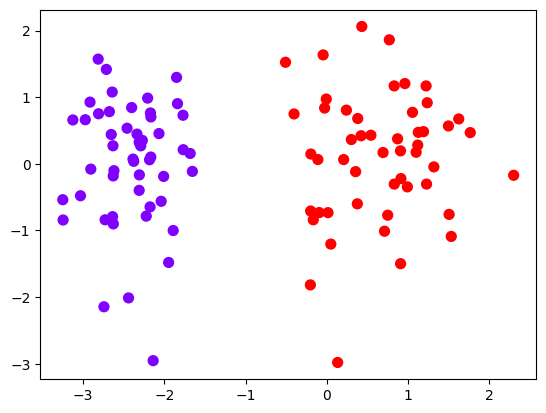

In [6]:
# Let's plot it

plt.scatter(x=X[:, 0], y=X[:, 1], c=y, cmap="rainbow", s=50)
plt.show()

In [7]:
# Demo test
np.insert(arr=X, obj=0, values=1, axis=1)[:10]

array([[ 1.        ,  0.35523945, -0.11697552],
       [ 1.        , -0.09282829, -0.73115232],
       [ 1.        , -0.1984984 , -0.7081059 ],
       [ 1.        , -2.44001098, -2.01199214],
       [ 1.        , -0.0448475 ,  1.63493163],
       [ 1.        , -1.68155714,  0.15599044],
       [ 1.        , -2.64121606,  1.07782053],
       [ 1.        ,  0.2416527 ,  0.80626713],
       [ 1.        , -0.40266099,  0.74859527],
       [ 1.        , -2.80888854,  0.75152794]])

In [8]:
# demo test

np.random.randint(low=0, high=X.shape[0])

59

In [9]:
# demo test
np.ones(X.shape[1])

array([1., 1.])

In [10]:
# Let's make a class

class PerceptronTrick:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.lr = learning_rate
        self.epochs = epochs
        self.weights = None
        self.intercept_ = None
        self.coef_ = None
        
        
    def fit(self, X, y):
        X = np.insert(arr=X, obj=0, values=1, axis=1)
        self.weights = np.ones(X.shape[1])
        
        for i in range(self.epochs):
            index_value = np.random.randint(low=0, high=X.shape[0])
            
            y_hat = self.__step_fun(np.dot(a=X[index_value], b=self.weights))
            
            self.weights = self.weights + self.lr * (y[index_value] - y_hat) * X[index_value]
            
        self.intercept_, self.coef_ = self.weights[0], self.weights[1:]
    
    def __step_fun(self, z):
        return 1 if z > 0 else 0


In [11]:
obj = PerceptronTrick(learning_rate=0.1, epochs=1000)

obj.fit(X, y)

In [12]:
obj.intercept_

1.2000000000000002

In [13]:
obj.coef_

array([1.16155716, 0.30654348])

In [14]:
m = -(obj.coef_[0] / obj.coef_[1])
b = -(obj.intercept_ / obj.coef_[1])

print(m)
print(b)

-3.7892085520025267
-3.914616020016359


In [15]:
x_input = np.linspace(start=-3, stop=3, num=100)

y_input = m * x_input + b # y = mx + b

In [30]:
y_input

array([  7.45300964,   7.22336063,   6.99371163,   6.76406263,
         6.53441362,   6.30476462,   6.07511562,   5.84546661,
         5.61581761,   5.38616861,   5.1565196 ,   4.9268706 ,
         4.6972216 ,   4.4675726 ,   4.23792359,   4.00827459,
         3.77862559,   3.54897658,   3.31932758,   3.08967858,
         2.86002957,   2.63038057,   2.40073157,   2.17108256,
         1.94143356,   1.71178456,   1.48213555,   1.25248655,
         1.02283755,   0.79318854,   0.56353954,   0.33389054,
         0.10424154,  -0.12540747,  -0.35505647,  -0.58470547,
        -0.81435448,  -1.04400348,  -1.27365248,  -1.50330149,
        -1.73295049,  -1.96259949,  -2.1922485 ,  -2.4218975 ,
        -2.6515465 ,  -2.88119551,  -3.11084451,  -3.34049351,
        -3.57014252,  -3.79979152,  -4.02944052,  -4.25908952,
        -4.48873853,  -4.71838753,  -4.94803653,  -5.17768554,
        -5.40733454,  -5.63698354,  -5.86663255,  -6.09628155,
        -6.32593055,  -6.55557956,  -6.78522856,  -7.01

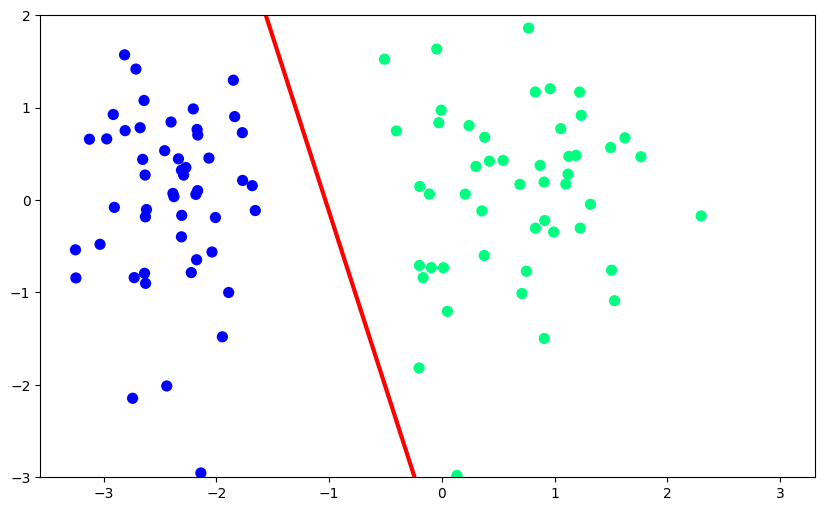

In [16]:
# Let's plot our line

plt.figure(figsize=(10,6))
plt.plot(x_input, y_input, color='red', linewidth=3)
plt.scatter(x=X[:,0], y=X[:,1], c=y, cmap='winter', s=50)
plt.ylim(-3,2)
plt.show()

### Make animation

In [17]:
def step(z):
    return 1 if z>0 else 0

In [18]:
def perceptron(X, y):
    
    m = []
    b = []
    
    X = np.insert(X, 0, 1, axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1
    
    for i in range(200):
        j = np.random.randint(0, 100)
        y_hat = step(np.dot(X[j],weights))
        weights = weights + lr*(y[j]-y_hat)*X[j]
        
        m.append(-(weights[1]/weights[2]))
        b.append(-(weights[0]/weights[2]))
        
    return m,b

In [19]:
m,b = perceptron(X,y)

In [20]:
%matplotlib notebook
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation

<IPython.core.display.Javascript object>


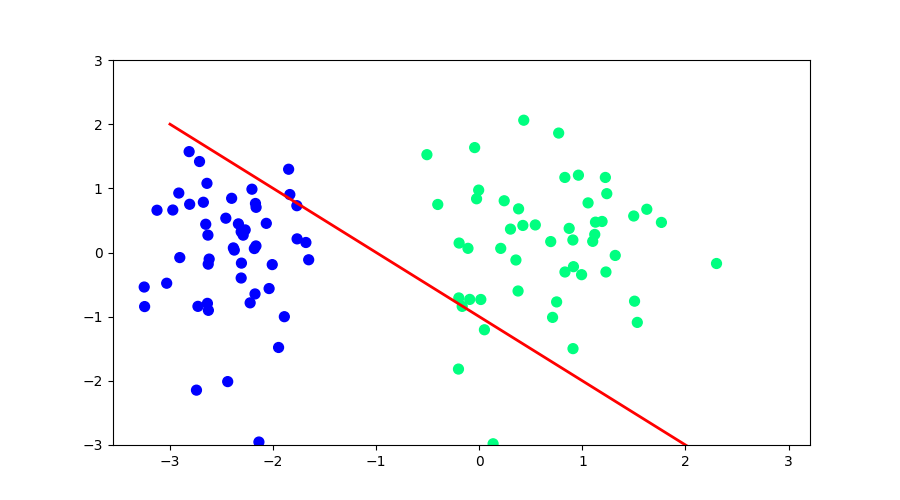

In [21]:
fig, ax = plt.subplots(figsize=(9,5))

x_i = np.arange(-3, 3, 0.1)

y_i = x_i*m[0] + b[0]

ax.scatter(X[:, 0], X[:, 1], c=y, cmap='winter', s=50)

line, = ax.plot(x_i, x_i* m[0] + b[0] , 'r-', linewidth=2)

plt.ylim(-3, 3)

def update(i):
    label = 'epoch {0}'.format(i + 1)
    line.set_ydata(x_i * m[i] + b[i])
    ax.set_xlabel(label)
    # return line, ax

anim = FuncAnimation(fig, update, repeat=True, frames=200, interval=100)

## Apply Scikit-Learn Logistic Regression

In [22]:
lr_model = LogisticRegression()

In [23]:
lr_model.fit(X=X, y=y)

LogisticRegression()

In [24]:
lr_model.coef_

array([[2.87119932, 0.03099621]])

In [25]:
lr_model.intercept_

array([2.83641872])

In [26]:
m = -(lr_model.coef_[0][0] / lr_model.coef_[0][1])

b = -(lr_model.intercept_ / lr_model.coef_[0][1])

In [27]:
x_input1 = np.linspace(start=-3, stop=3, num=100)

y_input1 = m * x_input + b

<IPython.core.display.Javascript object>


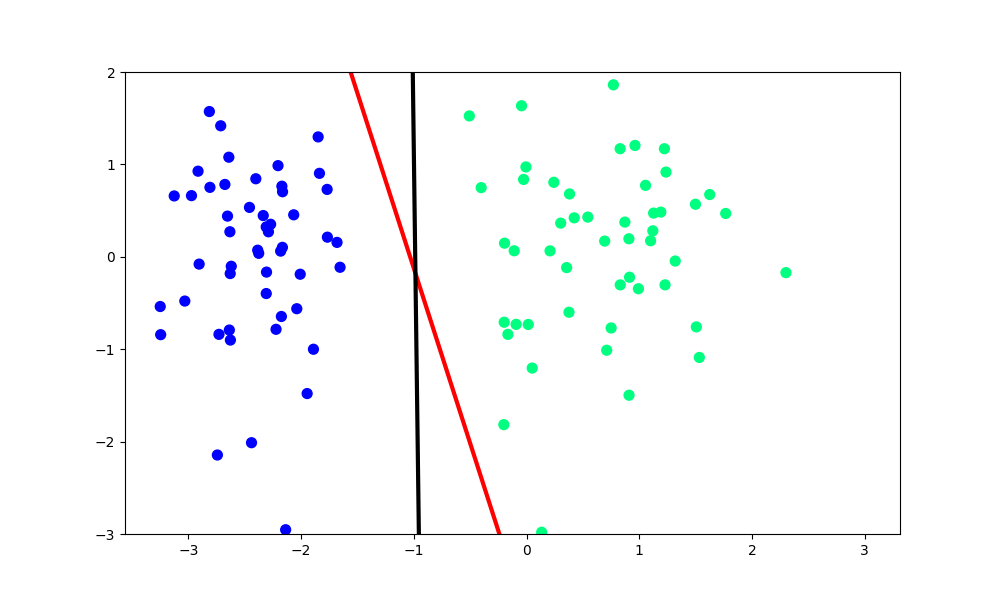

In [28]:
# Let's plot our line

plt.figure(figsize=(10,6))
plt.plot(x_input, y_input, color='red', linewidth=3)
plt.plot(x_input1, y_input1, color='black', linewidth=3)
plt.scatter(x=X[:,0], y=X[:,1], c=y, cmap='winter', s=50)
plt.ylim(-3,2)
plt.show()